<a href="https://colab.research.google.com/github/Khamdanfakhryza/Decoding-Machine-Learning-Ingtermediate/blob/main/ML_NLP_intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install google-play-scraper

In [22]:
from google_play_scraper import app, reviews, Sort, reviews_all
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
scrapreview = reviews_all(
    'iflix.play',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=3000
)
import csv

with open('ulasan_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])
    for review in scrapreview:
        writer.writerow([review['content']])

app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

In [25]:
app_reviews_df = pd.DataFrame(scrapreview)
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,53cbc709-0730-4003-9df9-617703cbf9a2,Jay S,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya ucapkan terimakasih buat developer yang u...,1,25,5.15.1.603592820,2024-08-09 02:53:28,"Hi Kak, mohon maaf udh buat Kakak ga nyaman ya...",2024-08-10 01:25:19,5.15.1.603592820
1,20e46e86-a728-4e35-bfc4-785f809da6fa,Al Ayyubi,https://play-lh.googleusercontent.com/a-/ALV-U...,Sejak update aplikasi versi paling baru... Saa...,3,331,5.14.2.603592650,2024-06-23 04:59:20,"Hi kak! Mohon maaf ya. Sebelumnya, bisa coba c...",2024-06-23 10:56:03,5.14.2.603592650
2,adebd360-7aff-4349-8826-36750c980f19,Arif Aja,https://play-lh.googleusercontent.com/a/ACg8oc...,pesan buat developer iflix dan penilain aplika...,4,7,5.15.0.603592750,2024-08-03 23:56:22,"Hai kak, Terimakasih atas rating yang diberika...",2024-08-04 18:17:50,5.15.0.603592750
3,882da2b6-5072-467f-b580-7af0aba6a7fd,Erna Widari,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya berlangganan setiap bulan & tidak pernah ...,1,73,5.13.5.603592520,2024-05-09 10:30:03,Hi Kak! Mohon maaf sebelumnya yaa mohon pastik...,2024-05-09 17:39:34,5.13.5.603592520
4,394290de-a4f4-4e79-be99-e859d981d762,Nia Anikmah,https://play-lh.googleusercontent.com/a-/ALV-U...,"Buat kalian yang suka nonton gratisan, sebaikn...",2,20,5.14.2.603592650,2024-06-07 00:52:36,"Hai kak, Mohon maaf yaa atas ketidaknyamananny...",2024-06-07 01:06:56,5.14.2.603592650


In [26]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108201 entries, 0 to 108200
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              108201 non-null  object        
 1   userName              108201 non-null  object        
 2   userImage             108201 non-null  object        
 3   content               108200 non-null  object        
 4   score                 108201 non-null  int64         
 5   thumbsUpCount         108201 non-null  int64         
 6   reviewCreatedVersion  68106 non-null   object        
 7   at                    108201 non-null  datetime64[ns]
 8   replyContent          41018 non-null   object        
 9   repliedAt             41018 non-null   datetime64[ns]
 10  appVersion            68106 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 9.1+ MB


In [27]:
clean_df = app_reviews_df.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26183 entries, 0 to 83600
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              26183 non-null  object        
 1   userName              26183 non-null  object        
 2   userImage             26183 non-null  object        
 3   content               26183 non-null  object        
 4   score                 26183 non-null  int64         
 5   thumbsUpCount         26183 non-null  int64         
 6   reviewCreatedVersion  26183 non-null  object        
 7   at                    26183 non-null  datetime64[ns]
 8   replyContent          26183 non-null  object        
 9   repliedAt             26183 non-null  datetime64[ns]
 10  appVersion            26183 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 2.4+ MB


In [28]:
clean_df = clean_df.drop_duplicates()


In [29]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text


In [30]:
def casefoldingText(text):
    text = text.lower()
    return text


In [31]:
def tokenizingText(text):
    text = word_tokenize(text)
    return text


In [32]:
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = [txt for txt in text if txt not in listStopwords]
    return filtered


In [33]:
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)


In [34]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

In [35]:
def replaceSlangWords(text, slang_dict):
    words = text.split()
    return ' '.join([slang_dict.get(word, word) for word in words])


In [36]:
def preprocessText(text):
    text = cleaningText(text)
    text = casefoldingText(text)
    text = tokenizingText(text)
    text = filteringText(text)
    text = replaceSlangWords(text, slangwords)
    text = stemmingText(text)
    return text


In [37]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,53cbc709-0730-4003-9df9-617703cbf9a2,Jay S,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya ucapkan terimakasih buat developer yang u...,1,25,5.15.1.603592820,2024-08-09 02:53:28,"Hi Kak, mohon maaf udh buat Kakak ga nyaman ya...",2024-08-10 01:25:19,5.15.1.603592820
1,20e46e86-a728-4e35-bfc4-785f809da6fa,Al Ayyubi,https://play-lh.googleusercontent.com/a-/ALV-U...,Sejak update aplikasi versi paling baru... Saa...,3,331,5.14.2.603592650,2024-06-23 04:59:20,"Hi kak! Mohon maaf ya. Sebelumnya, bisa coba c...",2024-06-23 10:56:03,5.14.2.603592650
2,adebd360-7aff-4349-8826-36750c980f19,Arif Aja,https://play-lh.googleusercontent.com/a/ACg8oc...,pesan buat developer iflix dan penilain aplika...,4,7,5.15.0.603592750,2024-08-03 23:56:22,"Hai kak, Terimakasih atas rating yang diberika...",2024-08-04 18:17:50,5.15.0.603592750
3,882da2b6-5072-467f-b580-7af0aba6a7fd,Erna Widari,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya berlangganan setiap bulan & tidak pernah ...,1,73,5.13.5.603592520,2024-05-09 10:30:03,Hi Kak! Mohon maaf sebelumnya yaa mohon pastik...,2024-05-09 17:39:34,5.13.5.603592520
4,394290de-a4f4-4e79-be99-e859d981d762,Nia Anikmah,https://play-lh.googleusercontent.com/a-/ALV-U...,"Buat kalian yang suka nonton gratisan, sebaikn...",2,20,5.14.2.603592650,2024-06-07 00:52:36,"Hai kak, Mohon maaf yaa atas ketidaknyamananny...",2024-06-07 01:06:56,5.14.2.603592650
...,...,...,...,...,...,...,...,...,...,...,...
83587,c0e3a945-cc67-4d14-99f2-89435a6e2568,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tak bisa buka jelek,2,0,1.1.2,2016-12-15 07:30:29,"Hai, wah mohon maaf atas ketidaknyamanannya ya...",2016-12-15 08:16:23,1.1.2
83590,dce4c0cb-3169-49b2-af78-8f7f6026dd57,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya cobaiin dulu,5,0,1.1.2,2016-10-13 01:13:48,Hai Dahlan! Siaaaap! Selamat menonton konten f...,2016-10-14 11:26:53,1.1.2
83592,29e68539-2b16-43fa-8458-870788a5b18f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,best,5,0,1.1.2,2019-05-12 12:57:01,"Hi Gelap! Thank you for your rating, and happy...",2019-05-13 04:42:57,1.1.2
83598,262c335e-ae85-4a02-a893-d5fea740d78f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantapppp,5,0,1.1.2,2017-06-12 15:21:02,Hai. Terima kasih sudah mencoba aplikasi kami....,2017-06-13 04:19:04,1.1.2


In [46]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords resource if you haven't already
nltk.download('stopwords')

# Load the Indonesian stopwords list
stopwords = stopwords.words('indonesian')

def filteringText(tokens):
    # Define the stopword filtering function
    return [word for word in tokens if word not in stopwords]

# clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,53cbc709-0730-4003-9df9-617703cbf9a2,Jay S,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya ucapkan terimakasih buat developer yang u...,1,25,5.15.1.603592820,2024-08-09 02:53:28,"Hi Kak, mohon maaf udh buat Kakak ga nyaman ya...",2024-08-10 01:25:19,5.15.1.603592820,Saya ucapkan terimakasih buat developer yang u...,saya ucapkan terimakasih buat developer yang u...,saya ucapkan terimakasih buat developer yang u...,"[saya, ucapkan, terimakasih, buat, developer, ...","[ucapkan, terimakasih, developer, udah, ni, ap...",ucapkan terimakasih developer udah ni aplikasi...
1,20e46e86-a728-4e35-bfc4-785f809da6fa,Al Ayyubi,https://play-lh.googleusercontent.com/a-/ALV-U...,Sejak update aplikasi versi paling baru... Saa...,3,331,5.14.2.603592650,2024-06-23 04:59:20,"Hi kak! Mohon maaf ya. Sebelumnya, bisa coba c...",2024-06-23 10:56:03,5.14.2.603592650,Sejak update aplikasi versi paling baru... Saa...,sejak update aplikasi versi paling baru... saa...,sejak update aplikasi versi paling baru... saa...,"[sejak, update, aplikasi, versi, paling, baru....","[update, aplikasi, versi, baru..., menonton, s...",update aplikasi versi baru... menonton subtitl...
2,adebd360-7aff-4349-8826-36750c980f19,Arif Aja,https://play-lh.googleusercontent.com/a/ACg8oc...,pesan buat developer iflix dan penilain aplika...,4,7,5.15.0.603592750,2024-08-03 23:56:22,"Hai kak, Terimakasih atas rating yang diberika...",2024-08-04 18:17:50,5.15.0.603592750,pesan buat developer iflix dan penilain aplika...,pesan buat developer iflix dan penilain aplika...,pesan buat developer iflix dan penilain aplika...,"[pesan, buat, developer, iflix, dan, penilain,...","[pesan, developer, iflix, penilain, aplikasi, ...",pesan developer iflix penilain aplikasi terjem...
3,882da2b6-5072-467f-b580-7af0aba6a7fd,Erna Widari,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya berlangganan setiap bulan & tidak pernah ...,1,73,5.13.5.603592520,2024-05-09 10:30:03,Hi Kak! Mohon maaf sebelumnya yaa mohon pastik...,2024-05-09 17:39:34,5.13.5.603592520,Saya berlangganan setiap bulan & tidak pernah ...,saya berlangganan setiap bulan & tidak pernah ...,saya berlangganan setiap bulan & tidak pernah ...,"[saya, berlangganan, setiap, bulan, &, tidak, ...","[berlangganan, &, bermasalah, pembayaran, tagi...",berlangganan & bermasalah pembayaran tagihan b...
4,394290de-a4f4-4e79-be99-e859d981d762,Nia Anikmah,https://play-lh.googleusercontent.com/a-/ALV-U...,"Buat kalian yang suka nonton gratisan, sebaikn...",2,20,5.14.2.603592650,2024-06-07 00:52:36,"Hai kak, Mohon maaf yaa atas ketidaknyamananny...",2024-06-07 01:06:56,5.14.2.603592650,"Buat kalian yang suka nonton gratisan, sebaikn...","buat kalian yang suka nonton gratisan, sebaikn...","buat kalian yang suka nonton gratisan, sebaikn...","[buat, kalian, yang, suka, nonton, gratisan,, ...","[suka, nonton, gratisan,, mikir, 2x, download,...","suka nonton gratisan, mikir 2x download, aplik..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83587,c0e3a945-cc67-4d14-99f2-89435a6e2568,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tak bisa buka jelek,2,0,1.1.2,2016-12-15 07:30:29,"Hai, wah mohon maaf atas ketidaknyamanannya ya...",2016-12-15 08:16:23,1.1.2,Tak bisa buka jelek,tak bisa buka jelek,tak bisa buka jelek,"[tak, bisa, buka, jelek]","[buka, jelek]",buka jelek
83590,dce4c0cb-3169-49b2-af78-8f7f6026dd57,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya cobaiin dulu,5,0,1.1.2,2016-10-13 01:13:48,Hai Dahlan! Siaaaap! Selamat menonton konten f...,2016-10-14 11:26:53,1.1.2,Saya cobaiin dulu,saya cobaiin dulu,saya cobaiin dulu,"[saya, cobaiin, dulu]",[cobaiin],cobaiin
83592,29e68539-2b16-43fa-8458-870788a5b18f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,best

In [48]:
import csv
import requests
from io import StringIO

lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")


In [49]:
def sentiment_analysis_lexicon_indonesia(text):

    score = 0

    for word in text:

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'

    return score, polarity

In [50]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    15764
negative    10419
Name: count, dtype: int64


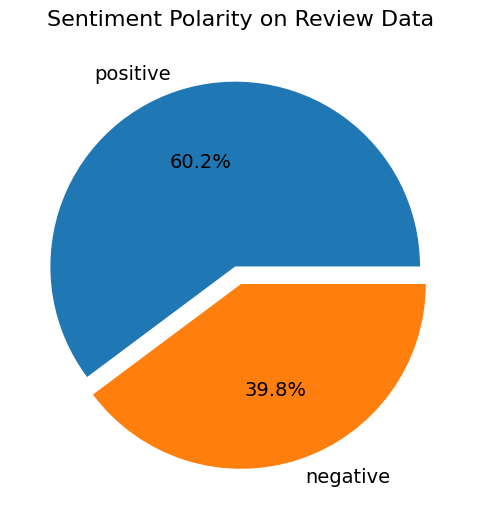

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)
explode = (0.1, 0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)
plt.show()

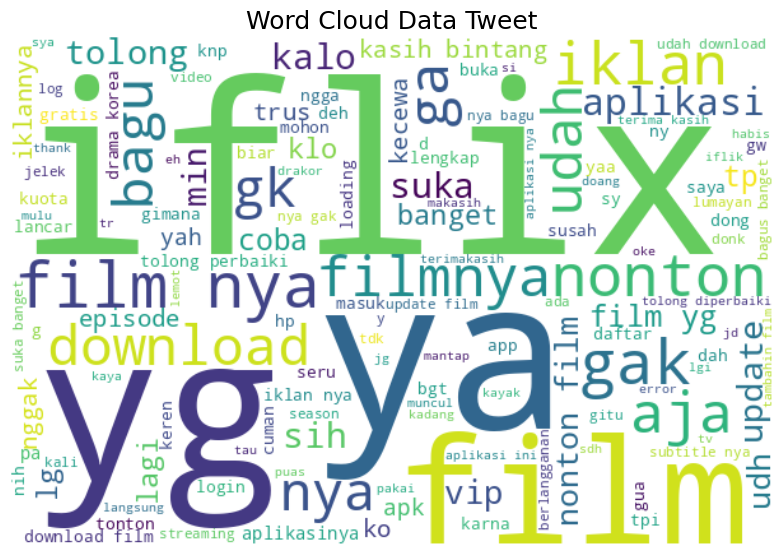

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in clean_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud Data Tweet', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow(wordcloud, interpolation='bilinear')

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()


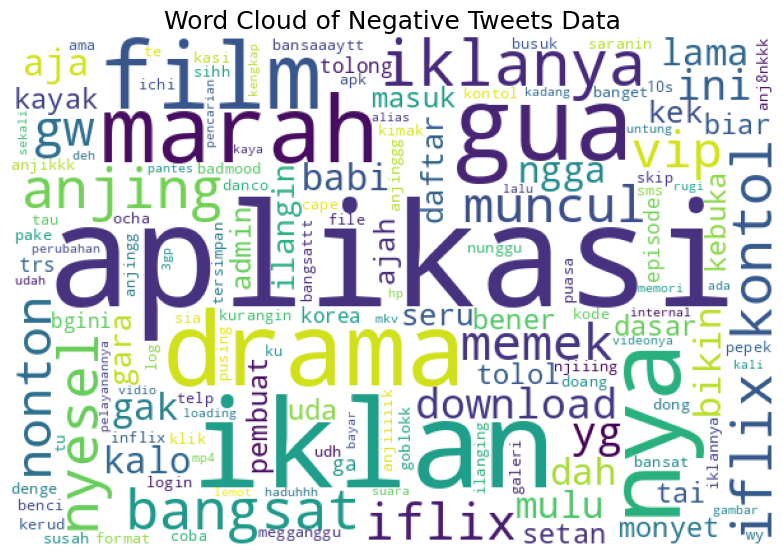

In [53]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

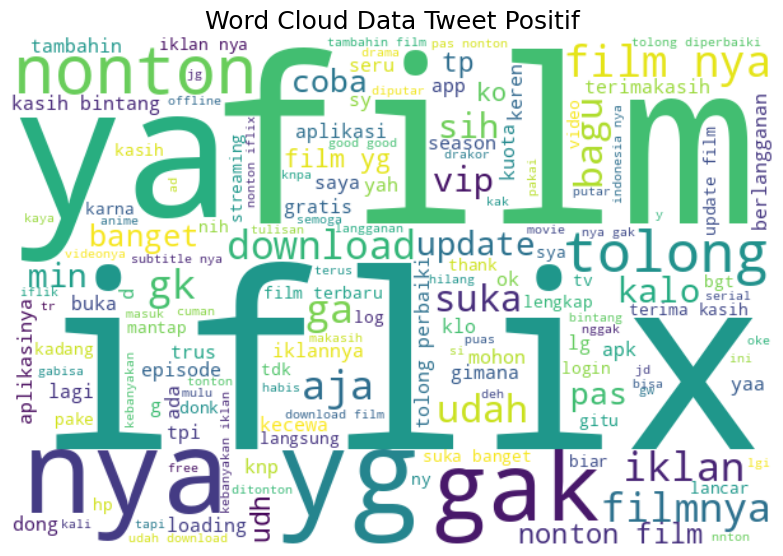

In [54]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud Data Tweet Positif', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow(wordcloud, interpolation='bilinear')

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()


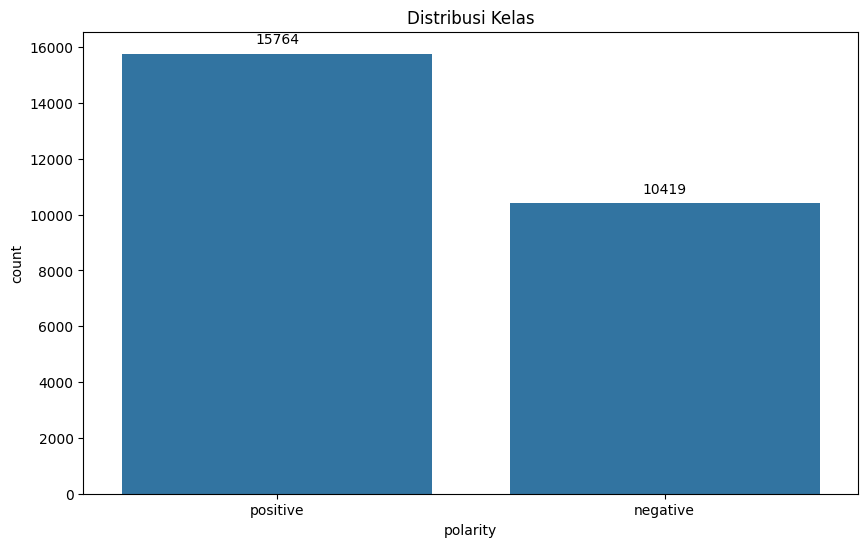

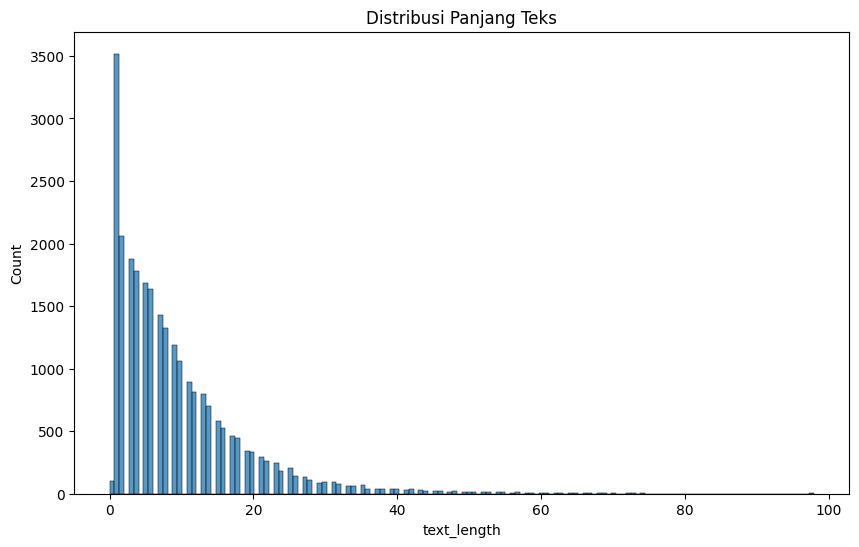

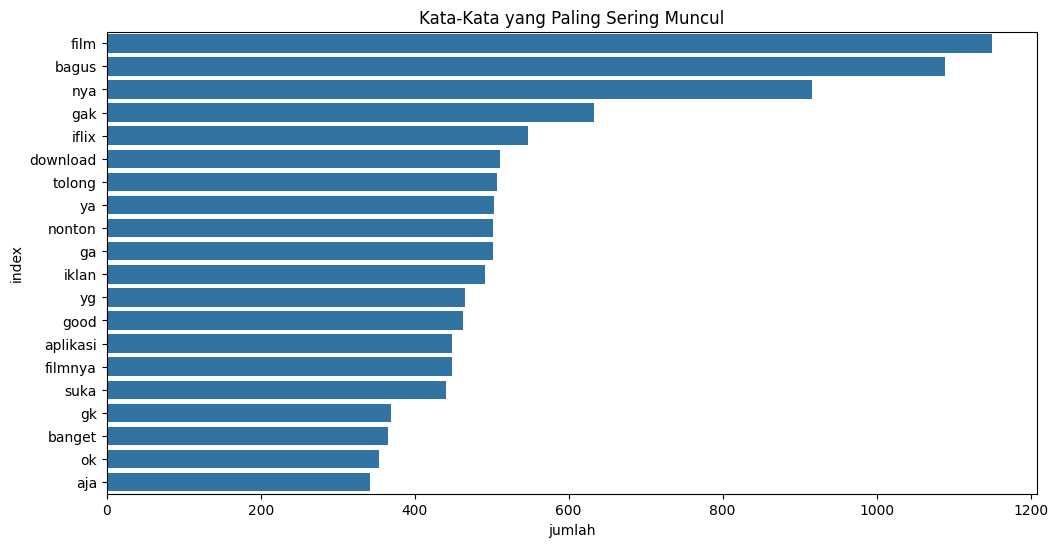

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Memeriksa distribusi kelas
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Distribusi Kelas')

# Menambahkan hitungan di atas batang pada plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Visualisasi distribusi panjang teks
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Distribusi Panjang Teks')
plt.show()

# Mengatur ukuran gambar
plt.figure(figsize=(12, 6))

# Visualisasi kata-kata yang paling sering muncul
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Kata-Kata yang Paling Sering Muncul')
plt.show()


In [56]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

# Menampilkan 5 baris pertama dari DataFrame 'clean_df'
clean_df.head(5)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,53cbc709-0730-4003-9df9-617703cbf9a2,Jay S,https://play-lh.googleusercontent.com/a/ACg8ocK10lDxJPv2tP5rYCMBzt9RNTw3iNhFkC1arEeq4b_ymsVWCw=mo,"Saya ucapkan terimakasih buat developer yang udah buat ni aplikasi, tapi saya sedikit Kesal sAma ini aplikasi karena iklannya banyak banget, mana satu iklan 30S x 6 gila iklannya aja 3 menit terkadang nambah lgi iklannya setiap 5 menit nonton pasti ada iklan, mana ngga bisa di skip iklannya, Kaloupun ngga VIP saya mohon perhatikan lagi untuk penerapan iklannya karena dapat menggangu kenyamanan dalam menonton, Mohon dengarkan keluhan kami terima kasih sebelumnya 🙏",1,25,5.15.1.603592820,2024-08-09 02:53:28,"Hi Kak, mohon maaf udh buat Kakak ga nyaman ya. Jika Kakak tidak berkenan ada iklan saat nonton Kakak bs update akunnya ke VIP ya. Kalau kakak beli VIP jg nggak akan rugi lho kak karena kakak bs nonton lbh banyak konten & untuk series on going jg bs nonton beberapa eps/bagian di awal setelah VIP. Yuk, langsung VIP aja kak! 💚",2024-08-10 01:25:19,5.15.1.603592820,"Saya ucapkan terimakasih buat developer yang udah buat ni aplikasi, tapi saya sedikit Kesal sAma ini aplikasi karena iklannya banyak banget, mana satu iklan 30S x 6 gila iklannya aja 3 menit terkadang nambah lgi iklannya setiap 5 menit nonton pasti ada iklan, mana ngga bisa di skip iklannya, Kaloupun ngga VIP saya mohon perhatikan lagi untuk penerapan iklannya karena dapat menggangu kenyamanan dalam menonton, Mohon dengarkan keluhan kami terima kasih sebelumnya 🙏","saya ucapkan terimakasih buat developer yang udah buat ni aplikasi, tapi saya sedikit kesal sama ini aplikasi karena iklannya banyak banget, mana satu iklan 30s x 6 gila iklannya aja 3 menit terkadang nambah lgi iklannya setiap 5 menit nonton pasti ada iklan, mana ngga bisa di skip iklannya, kaloupun ngga vip saya mohon perhatikan lagi untuk penerapan iklannya karena dapat menggangu kenyamanan dalam menonton, mohon dengarkan keluhan kami terima kasih sebelumnya 🙏","saya ucapkan terimakasih buat developer yang udah buat ni aplikasi, tapi saya sedikit kesal sama ini aplikasi karena iklannya banyak banget, mana satu iklan 30s x 6 gila iklannya aja 3 menit terkadang nambah lgi iklannya setiap 5 menit nonton pasti ada iklan, mana ngga bisa di skip iklannya, kaloupun ngga vip saya mohon perhatikan lagi untuk penerapan iklannya karena dapat menggangu kenyamanan dalam menonton, mohon dengarkan keluhan kami terima kasih sebelumnya 🙏","[saya, ucapkan, terimakasih, buat, developer, yang, udah, buat, ni, aplikasi,, tapi, saya, sedikit, kesal, sama, ini, aplikasi, karena, iklannya, banyak, banget,, mana, satu, iklan, 30s, x, 6, gila, iklannya, aja, 3, menit, terkadang, nambah, lgi, iklannya, setiap, 5, menit, nonton, pasti, ada, iklan,, mana, ngga, bisa, di, skip, iklannya,, kaloupun, ngga, vip, saya, mohon, perhatikan, lagi, untuk, penerapan, iklannya, karena, dapat, menggangu, kenyamanan, dalam, menonton,, mohon, dengarkan, keluhan, kami, terima, kasih, sebelumnya, 🙏]","[ucapkan, terimakasih, developer, udah, ni, aplikasi,, kesal, aplikasi, iklannya, banget,, iklan, 30s, x, 6, gila, iklannya, aja, 3, menit, terkadang, nambah, lgi, iklannya, 5, menit, nonton, iklan,, ngga, skip, iklannya,, kaloupun, ngga, vip, mohon, perhatikan, penerapan, iklannya, menggangu, kenyamanan, menonton,, mohon, dengarkan, keluhan, terima, kasih, 🙏]","ucapkan terimakasih developer udah ni aplikasi, kesal aplikasi iklannya banget, iklan 30s x 6 gila iklannya aja 3 menit terkadang nambah lgi iklannya 5 menit nonton iklan, ngga skip iklannya, kaloupun ngga vip mohon perhatikan penerapan iklannya menggangu kenyamanan menonton, mohon dengarkan keluhan terima kasih 🙏",2,positive,46
1,20e46e86-a728-4e35-bfc4-785f809da6fa,Al Ayyubi,https://play-lh.googleusercontent.c

In [57]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengan menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi DataFrame
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Tampilkan DataFrame hasil ekstraksi fitur
features_df


,ad,ada,admin,aja,akun,anime,apk,aplikasi,aplikasinya,app,...,video,videonya,vidio,vip,wifi,xl,ya,yaa,yah,yg
0,0.0,0.0,0.000000,0.104717,0.000000,0.0,0.0,0.199477,0.0,0.0,...,0.000000,0.0,0.0,0.122453,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.337964,0.0,0.0,...,0.221526,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.383663,0.237816,0.000000,0.0,0.0,0.226511,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.646896,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.231943,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.254409,0.000000,0.0,0.0,0.242315,0.0,0.0,...,0.000000,0.0,0.0,0.297501,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26178,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
26179,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
26180,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
26181,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
random_forest = RandomForestClassifier()

# Latih model Random Forest dengan data pelatihan
random_forest.fit(X_train, y_train)

# Lakukan prediksi pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)

# Hitung akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

# Tampilkan akurasi
print('Random Forest - Akurasi pada data latih:', accuracy_train_rf)
print('Random Forest - Akurasi pada data uji:', accuracy_test_rf)


Random Forest - Akurasi pada data latih: 0.9650052515993507
Random Forest - Akurasi pada data uji: 0.8122971166698492


In [63]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
logistic_model = LogisticRegression()

# Latih model Logistic Regression menggunakan data pelatihan
logistic_model.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
prediksi_latih_lr = logistic_model.predict(X_train)
prediksi_uji_lr = logistic_model.predict(X_test)

# Hitung akurasi model Logistic Regression pada data pelatihan
akurasi_latih_lr = accuracy_score(y_train, prediksi_latih_lr)

# Hitung akurasi model Logistic Regression pada data uji
akurasi_uji_lr = accuracy_score(y_test, prediksi_uji_lr)

# Tampilkan hasil akurasi
print('Logistic Regression - Akurasi pada data latih:', akurasi_latih_lr)
print('Logistic Regression - Akurasi pada data uji:', akurasi_uji_lr)

import pandas as pd

# Buat DataFrame untuk menampilkan akurasi
hasil_akurasi_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Akurasi Latih': [accuracy_train_rf, akurasi_latih_lr],
    'Akurasi Uji': [accuracy_test_rf, akurasi_uji_lr]
})

# Menampilkan hanya kolom "Akurasi Uji"
akurasi_uji_hanya = hasil_akurasi_df[['Model', 'Akurasi Uji']]
print(akurasi_uji_hanya)

# Mengurutkan DataFrame berdasarkan kolom "Akurasi Uji" dari tertinggi ke terendah
akurasi_uji_urut = akurasi_uji_hanya.sort_values(by='Akurasi Uji', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(akurasi_uji_urut)

# Input kalimat baru dari pengguna
kalimat_input = input("Masukkan kalimat baru: ")

# Lakukan preprocessing pada kalimat baru
kalimat_input_bersih = cleaningText(kalimat_input)
kalimat_input_casefold = casefoldingText(kalimat_input_bersih)
kalimat_input_slang = fix_slangwords(kalimat_input_casefold)
kalimat_input_token = tokenizingText(kalimat_input_slang)
kalimat_input_filter = filteringText(kalimat_input_token)
kalimat_input_akhir = toSentence(kalimat_input_filter)

# Transformasi kalimat baru menggunakan TF-IDF yang sudah dilatih
X_kalimat_input = tfidf.transform([kalimat_input_akhir])

# Prediksi sentimen untuk kalimat baru
hasil_prediksi_sentimen = logistic_model.predict(X_kalimat_input)

# Menampilkan hasil prediksi
if hasil_prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")


Logistic Regression - Akurasi pada data latih: 0.8254559343072663
Logistic Regression - Akurasi pada data uji: 0.8235631086499905
                 Model  Akurasi Uji
0        Random Forest     0.812297
1  Logistic Regression     0.823563
                 Model  Akurasi Uji
1  Logistic Regression     0.823563
0        Random Forest     0.812297
Masukkan kalimat baru: baik
Sentimen kalimat baru adalah POSITIF.
